In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [ ]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


Show Examples

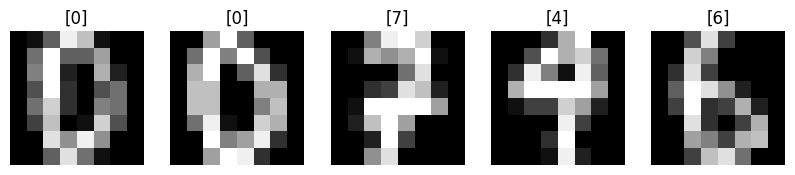

In [ ]:
Xnp = X.to_numpy()
Ynp = y.to_numpy()
fig,ax = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(10,10)
)
for i in range(5):
    testImg = Xnp[i].reshape(8,8)
    ax[i].imshow(testImg,cmap=plt.cm.gray)
    ax[i].set_title(Ynp[i])
    ax[i].axis('off')


plt.show()

Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train)

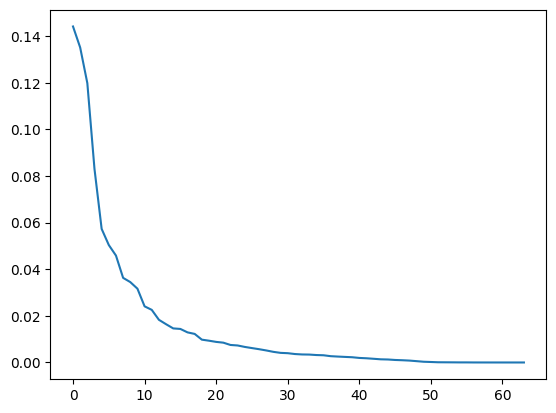

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
yTrainNp = y_train.to_numpy()

<Axes: >

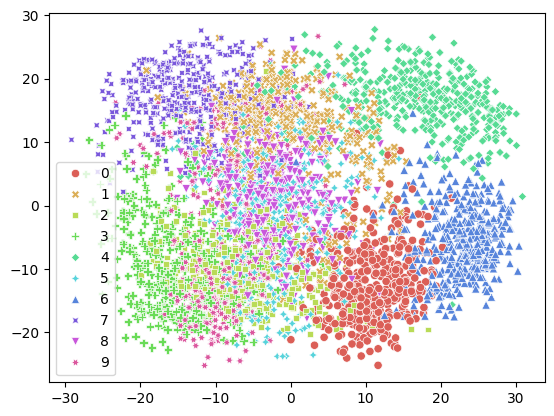

In [ ]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],style = yTrainNp.reshape(-1),hue = yTrainNp.reshape(-1),palette = sns.color_palette("hls", 10))

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train,yTrainNp.reshape(-1))


y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")


Accuracy: 95.11 %


<Axes: >

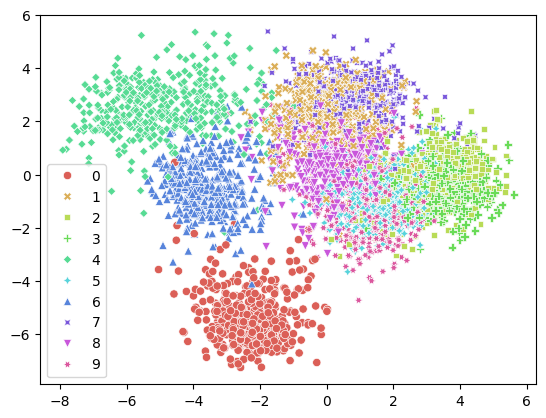

In [ ]:
sns.scatterplot(x=X_lda[:,0],y=X_lda[:,1],style=yTrainNp.reshape(-1),hue=yTrainNp.reshape(-1),palette=sns.color_palette("hls", 10))

t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

<Axes: >

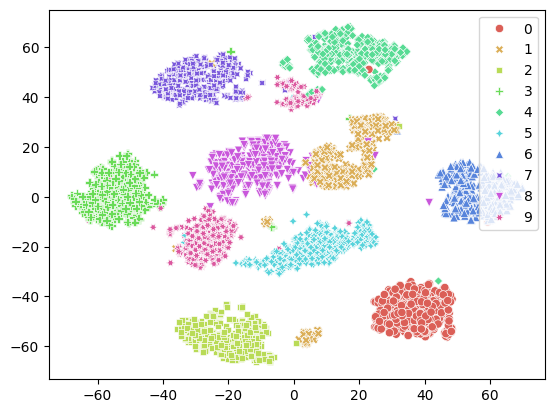

In [ ]:
sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],style=yTrainNp.reshape(-1),hue=yTrainNp.reshape(-1),palette=sns.color_palette("hls", 10))

Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create pipeline components
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis(n_components=9)
svm = SVC()

# Create the pipeline
pipeline = Pipeline([('scaler', scaler), ('lda', lda), ('svm', svm)])

# Fit the pipeline to the training data
pipeline.fit(X_train, yTrainNp.reshape(-1))

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")

Accuracy: 96.89 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.94      0.97      0.96       102
           2       1.00      0.98      0.99       107
           3       0.97      0.96      0.97       118
           4       0.96      0.97      0.97       117
           5       0.95      0.95      0.95        97
           6       0.97      0.98      0.97       123
           7       1.00      1.00      1.00       124
           8       0.96      0.94      0.95       105
           9       0.94      0.94      0.94       123

    accuracy                           0.97      1124
   macro avg       0.97      0.97      0.97      1124
weighted avg       0.97      0.97      0.97      1124



In [ ]:
y_test_np = y_test.to_numpy().reshape(-1)
y_pred_np = y_pred.reshape(-1)

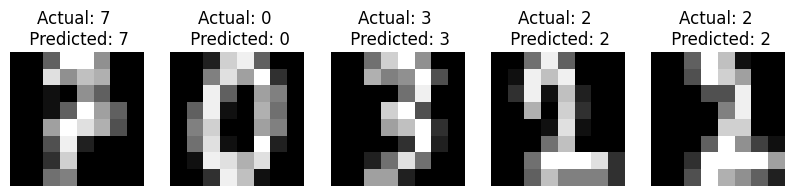

In [ ]:

fig,ax = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(10,10)
)
for i in range(5):
    X_testNp = X_test.to_numpy()
    testImg = X_testNp[i].reshape(8,8)
    ax[i].imshow(testImg,cmap=plt.cm.gray)
    ax[i].set_title("Actual: " + str(y_test_np[i]) + " \n Predicted: " +str(y_pred_np[i]))
    ax[i].axis('off')

SVM

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

model = SVC()
model.fit(X_train_scaled, yTrainNp.reshape(-1))
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: %.2f" % accuracy, "%")


Accuracy: 98.84 %
